# Imports

In [4]:
import pyxdf
import pandas as pd
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
from pprint import pprint
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.path.dirname("utils"), '..')))
from utils import *

# Load Data

In [5]:
sub_files = glob('/Users/camilla.strauss/Desktop/CUNY_Data/Data/*/*.xdf')

In [13]:
# Load data for each participant
all_et_dfs = {}
sub_names = {}
for sub_number in range(len(sub_files)): 
    xdf_path = sub_files[sub_number]
    et_df = import_et_data(xdf_path)
    sub_names[sub_number] = xdf_path.split('/')[6].split('-')[1]
    all_et_dfs[sub_number] = et_df


# hist of euclidian distances between left and right eye gaze points

In [23]:
for sub_number in range(len(sub_files)): 
    all_et_dfs[sub_number]['diff'] = all_et_dfs[sub_number].lsl_time_stamp.diff()

In [24]:
def gaze_point_histogram(sub_number, ax):
    # remove nans
    et_nums = all_et_dfs[sub_number][~np.isnan(all_et_dfs[sub_number].left_gaze_point_on_display_area_0) &
        ~np.isnan(all_et_dfs[sub_number].left_gaze_point_on_display_area_1) &
        ~np.isnan(all_et_dfs[sub_number].right_gaze_point_on_display_area_0) &
        ~np.isnan(all_et_dfs[sub_number].right_gaze_point_on_display_area_1)]
    
    # euclid distance 
    x1 = et_nums.right_gaze_point_on_display_area_0
    x2 = et_nums.left_gaze_point_on_display_area_0
    y1 = et_nums.right_gaze_point_on_display_area_1
    y2 = et_nums.left_gaze_point_on_display_area_1
    dists = np.sqrt((x2 - x1)**2 + (y2 - y1)**2)

    # return vars
    sub_name = sub_names[sub_number]
    dmax = np.nanmax(dists)
    nsamp = len(all_et_dfs[sub_number])
    srate = 1/(all_et_dfs[sub_number]['diff'].median())
    over02 = round(sum(dists >= 0.2)/len(dists) * 100, 2) # percent of non-NaN data w distance over 0.2

    # plot
    if ax is None:
        fig, ax = plt.subplots()

    ax.hist(dists, bins =75, alpha = 0.6, label = sub_name)
    ax.set_title(f'Distribution of Distances Between \nLeft and Right Gaze Points for Subject {sub_name}')
    ax.set_xlabel('Distance between L + R Gaze Points')
    ax.set_ylabel('Count')

    return sub_name, dmax, nsamp, srate, over02, ax



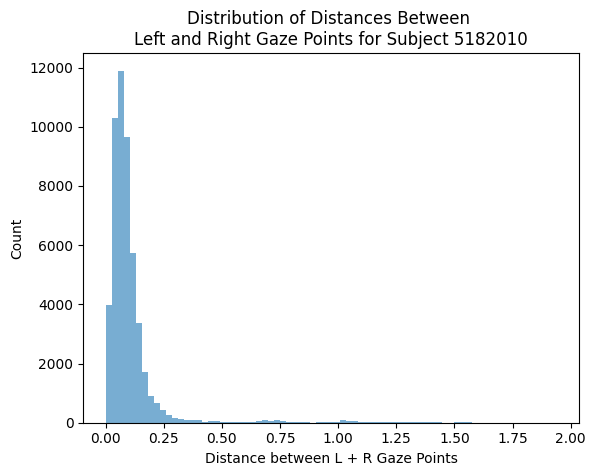

In [25]:
# run for just one subject
gaze_point_histogram(2, None)
plt.show()

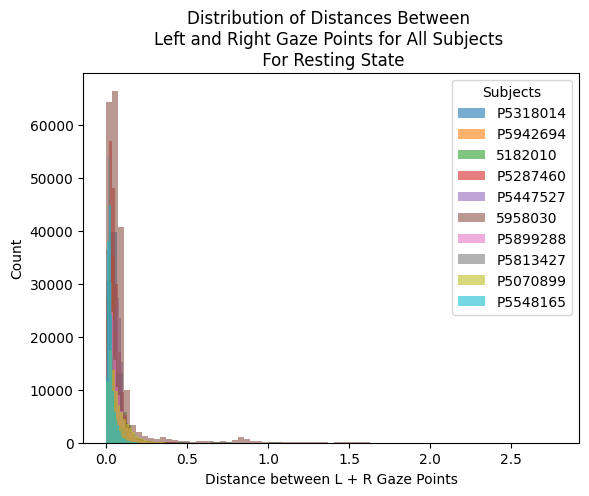

In [28]:
fig, ax1 = plt.subplots()
results1 = []

for sub_number in range(len(sub_files)):
    sub_name, dmax, nsamp, srate, over02, _ = gaze_point_histogram(sub_number, ax=ax1)  # Pass shared axes
    results1.append({'sub_number': sub_number, 'sub_id': sub_name, 'dmax': dmax, 'nsamp': nsamp, 'srate': srate, 'over02': over02})

ax1.legend(title = 'Subjects')
ax1.set_title('Distribution of Distances Between \nLeft and Right Gaze Points for All Subjects \n For Resting State')
plt.show()

In [29]:
pprint(results1, width = 200, sort_dicts = False)

[{'sub_number': 0, 'sub_id': 'P5318014', 'dmax': 2.601616, 'nsamp': 170397, 'srate': 119.9958699872985, 'over02': 1.6},
 {'sub_number': 1, 'sub_id': 'P5942694', 'dmax': 1.3055024, 'nsamp': 322446, 'srate': 119.9959093795447, 'over02': 0.33},
 {'sub_number': 2, 'sub_id': '5182010', 'dmax': 1.939446, 'nsamp': 137770, 'srate': 119.99581969936223, 'over02': 6.93},
 {'sub_number': 3, 'sub_id': 'P5287460', 'dmax': 1.3748573, 'nsamp': 270886, 'srate': 119.99573840062106, 'over02': 1.53},
 {'sub_number': 4, 'sub_id': 'P5447527', 'dmax': 0.86599404, 'nsamp': 300112, 'srate': 119.9958666347681, 'over02': 0.3},
 {'sub_number': 5, 'sub_id': '5958030', 'dmax': 2.7787168, 'nsamp': 273628, 'srate': 119.99573253370586, 'over02': 7.08},
 {'sub_number': 6, 'sub_id': 'P5899288', 'dmax': 1.1290684, 'nsamp': 292139, 'srate': 119.99569261774444, 'over02': 1.92},
 {'sub_number': 7, 'sub_id': 'P5813427', 'dmax': 0.9666368, 'nsamp': 263461, 'srate': 119.99589932194746, 'over02': 0.14},
 {'sub_number': 8, 'sub_

# Line plots- gaze point difference over time



## Distance between gaze points over time

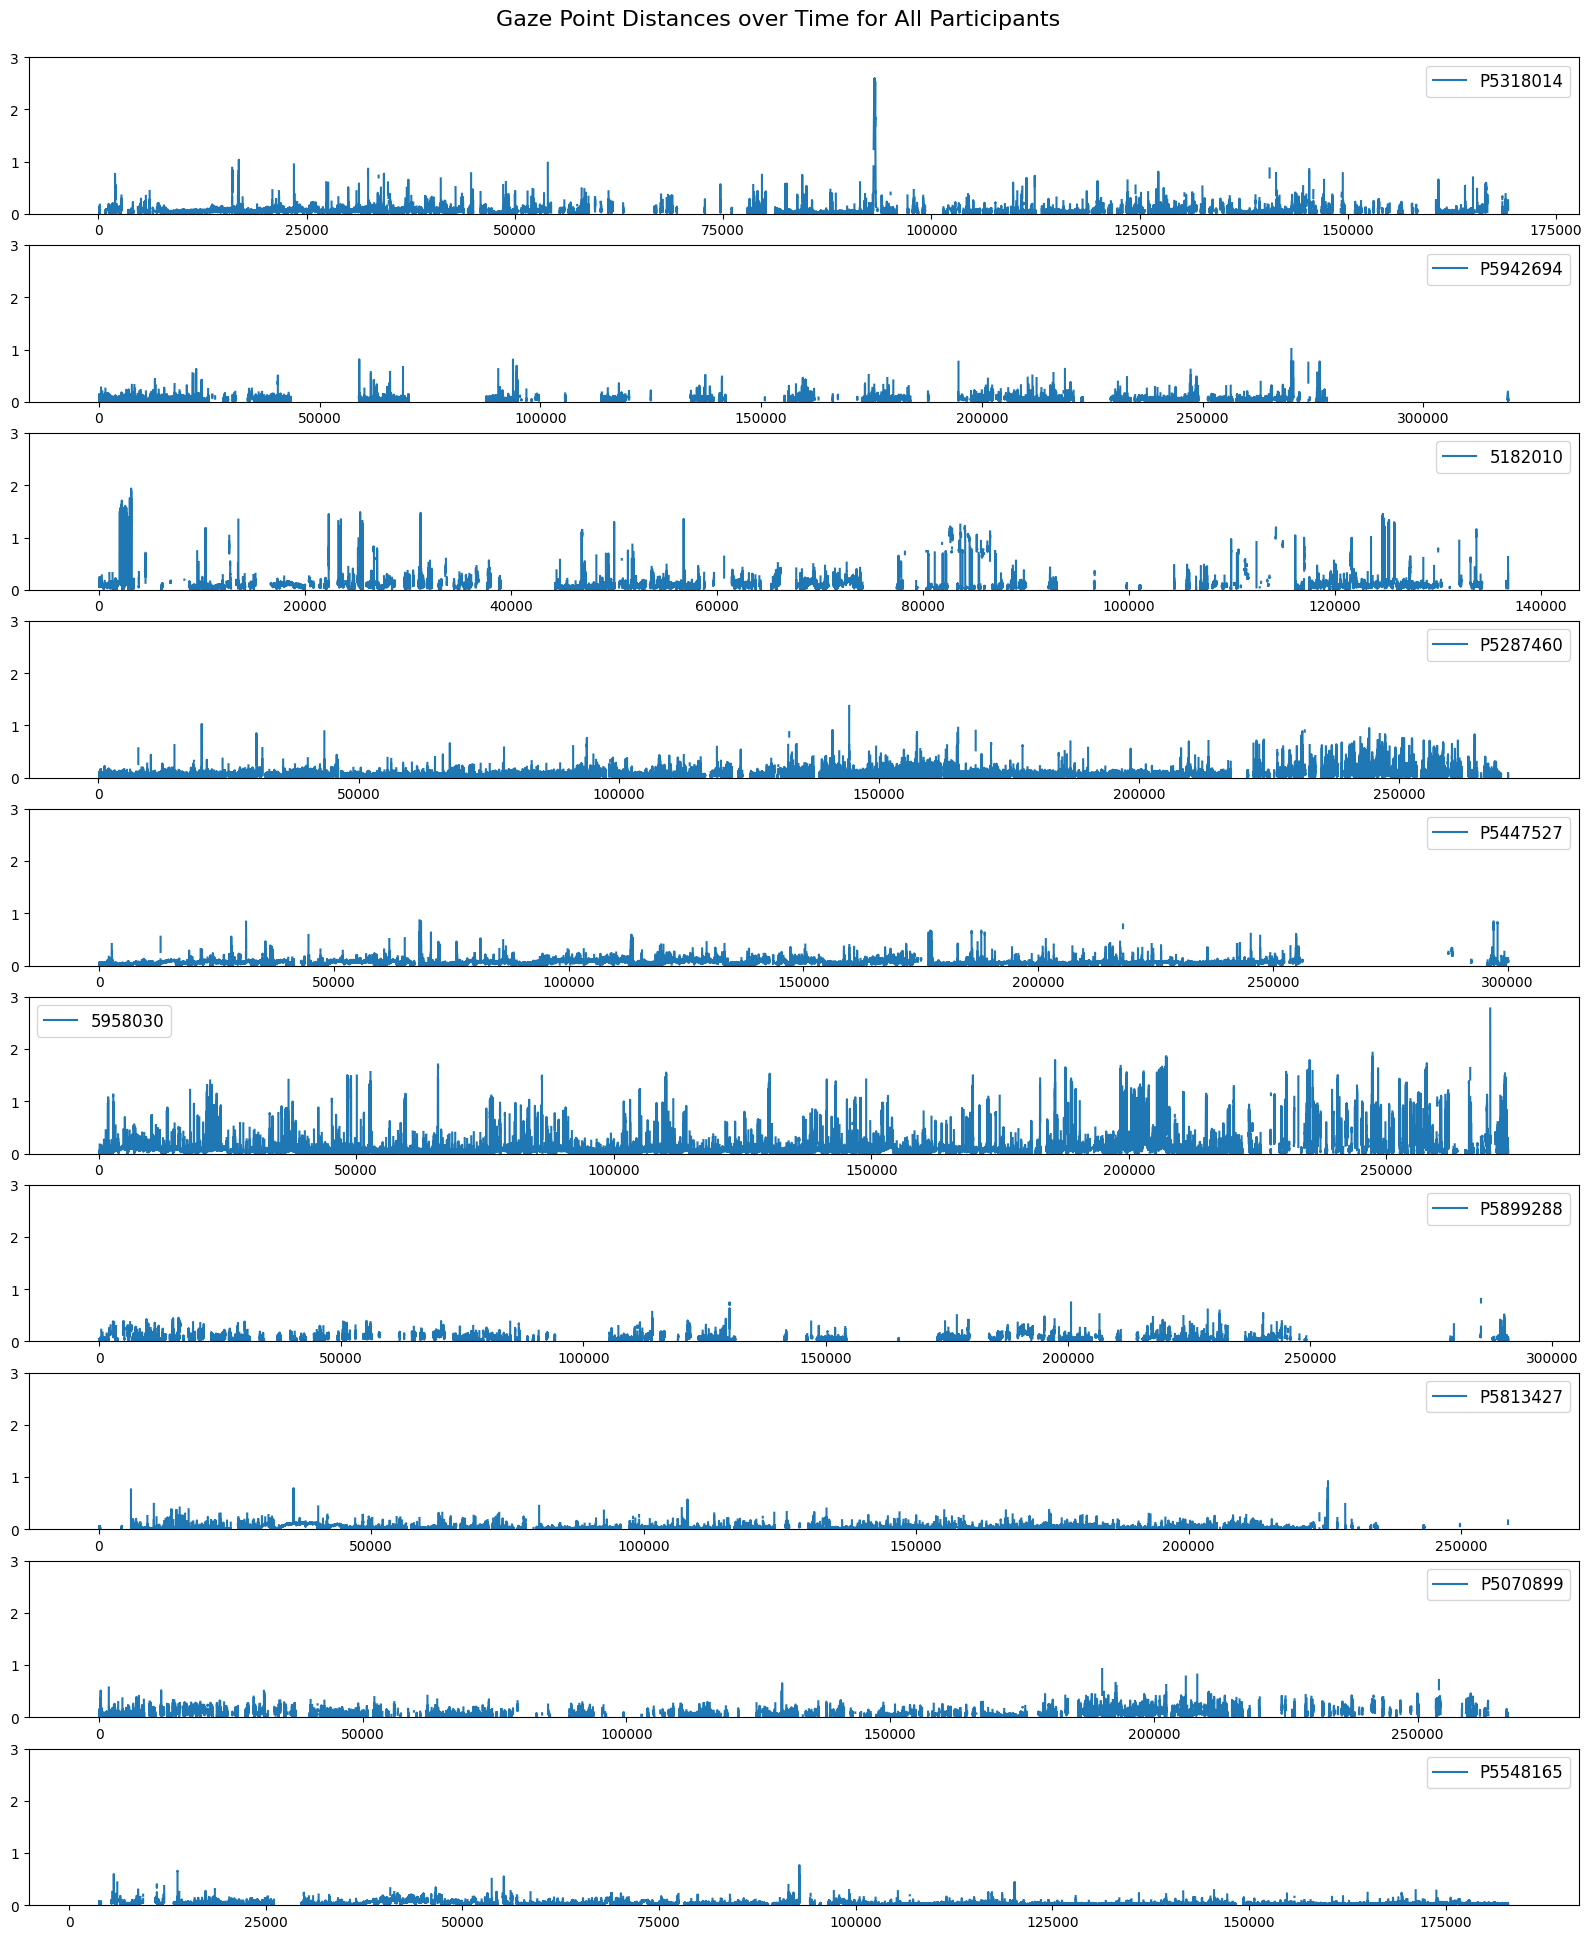

In [ ]:
# different axes 
fig, ax = plt.subplots(figsize=(20,24), nrows=len(sub_files), ncols=1)

for sub_number in range(len(sub_files)):
    x1 = all_et_dfs[sub_number].right_gaze_point_on_display_area_0
    x2 = all_et_dfs[sub_number].left_gaze_point_on_display_area_0
    y1 = all_et_dfs[sub_number].right_gaze_point_on_display_area_1
    y2 = all_et_dfs[sub_number].left_gaze_point_on_display_area_1
    dists = np.sqrt((x2 - x1)**2 + (y2 - y1)**2)

    ax[sub_number].plot(dists, label = sub_names[sub_number])
    ax[sub_number].set_ylim(0, 3)
    ax[sub_number].legend(fontsize = 'large')

fig.suptitle("Gaze Point Distances over Time for All Participants", y = .9, fontsize = 16)
plt.show()

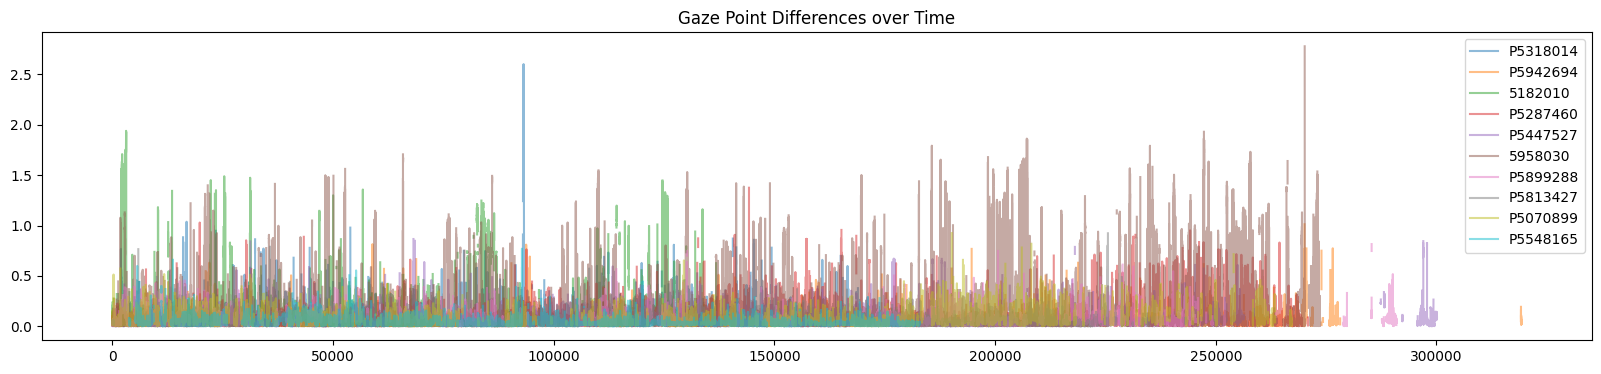

In [31]:
# shared axes 
fig = plt.figure(figsize = (20, 4))
for sub_number in range(len(sub_files)):
    x1 = all_et_dfs[sub_number].right_gaze_point_on_display_area_0
    x2 = all_et_dfs[sub_number].left_gaze_point_on_display_area_0
    y1 = all_et_dfs[sub_number].right_gaze_point_on_display_area_1
    y2 = all_et_dfs[sub_number].left_gaze_point_on_display_area_1
    dists = np.sqrt((x2 - x1)**2 + (y2 - y1)**2)

    plt.plot(dists, alpha = 0.5, label = sub_names[sub_number])
plt.title("Gaze Point Differences over Time")
plt.legend()
plt.show()